<a href="https://www.kaggle.com/code/nisaruddinshafi/loan-prediction?scriptVersionId=111914602" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval/sample_submission.csv
/kaggle/input/loan-approval/Loan Approval.ipynb
/kaggle/input/loan-approval/normalize.png
/kaggle/input/loan-approval/uni_bi_analysis.png
/kaggle/input/loan-approval/datatypes.png
/kaggle/input/loan-approval/train.csv
/kaggle/input/loan-approval/test.csv


In [2]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model =RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_squared_error(y_valid, preds)

In [3]:
train=pd.read_csv('../input/loan-approval/train.csv')
test=pd.read_csv('../input/loan-approval/test.csv')
sample=pd.read_csv('../input/loan-approval/sample_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.groupby(['Gender','Married','Education','Self_Employed','Credit_History']).count()

Loan_ID  Dependents  \
Gender Married Education    Self_Employed Credit_History                        
Female No      Graduate     No            0.0                  10           9   
                                          1.0                  39          38   
                            Yes           0.0                   1           1   
                                          1.0                   5           5   
               Not Graduate No            0.0                   2           2   
                                          1.0                   8           8   
                            Yes           1.0                   3           3   
       Yes     Graduate     No            0.0                   1           1   
                                          1.0                  18          18   
                            Yes           0.0                   2           2   
                                          1.0                   1           1   
               Not Graduate No            0.0                   1           1   
                                          1.0                   1           1   
                            Yes           1.0                   1           1   
Male   No      Graduate     No            0.0                  13          12   
                                          1.0                  66          65   
                            Yes           0.0                   2           2   
                                          1.0                   9           9   
               Not Graduate No            0.0                   3           3   
                                          1.0                  20          20   
                            Yes           0.0                   1           1   
                                          1.0                   2           2   
       Yes     Graduate     No            0.0                  26          25   
                                          1.0                 179         177   
                            Yes           0.0                   5           5   
                                          1.0                  32          31   
               Not Graduate No            0.0                  17          15   
                                          1.0                  47          46   
                            Yes           0.0                   1           1   
                                          1.0                   7           6   

                                                          ApplicantIncome  \
Gender Married Education    Self_Employed Credit_History                    
Female No      Graduate     No            0.0                          10   
                                          1.0                          39   
                            Yes           0.0                           1   
                                          1.0                           5   
               Not Graduate No            0.0                           2   
                                          1.0                           8   
                            Yes           1.0                           3   
       Yes     Graduate     No            0.0                           1   
                                          1.0                          18   
                            Yes           0.0                           2   
                                          1.0                           1   
               Not Graduate No            0.0                           1   
                                          1.0                           1   
                            Yes           1.0                           1   
Male   No      Graduate     No            0.0                          13   
                                          1.0                          66   
                            Yes           0.0                           2   
  

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

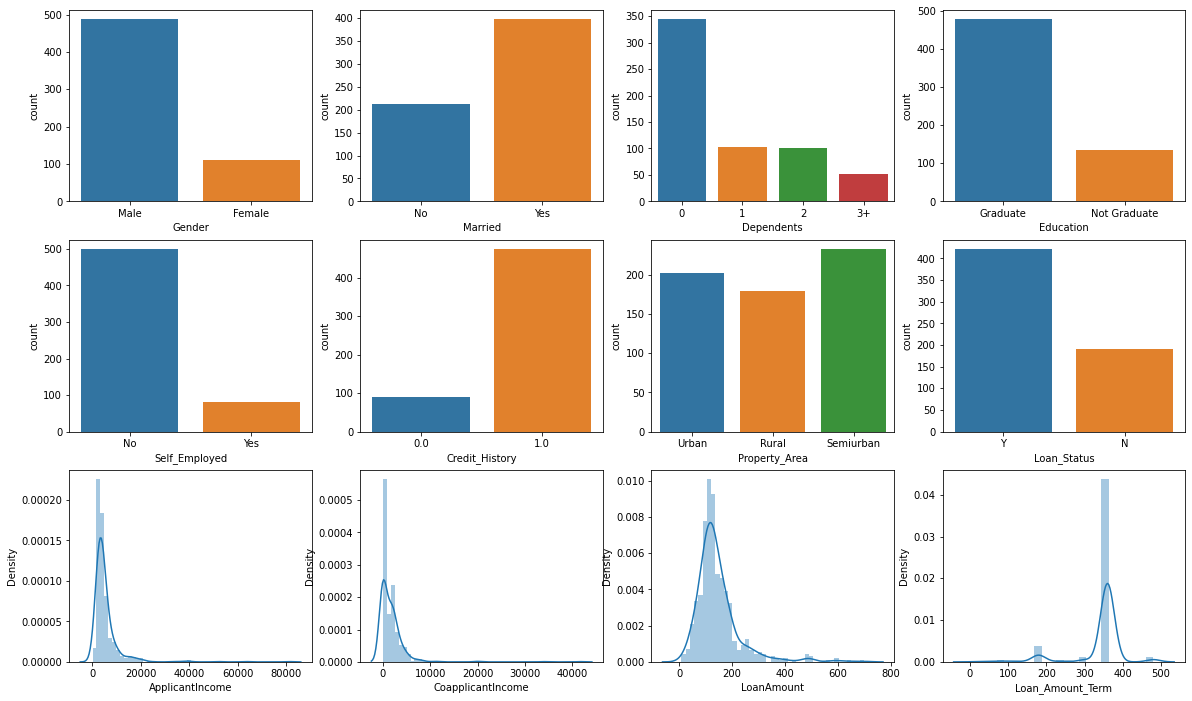

In [7]:
fig,ax=plt.subplots(3,4,figsize=(20,12))
plt.subplot(3,4,1)
sns.countplot(train.iloc[:,1])

plt.subplot(3,4,2)
sns.countplot(train.iloc[:,2])

plt.subplot(3,4,3)
sns.countplot(train.iloc[:,3])

plt.subplot(3,4,4)
sns.countplot(train.iloc[:,4])

plt.subplot(3,4,5)
sns.countplot(train.iloc[:,5])

plt.subplot(3,4,6)
sns.countplot(train.iloc[:,10])

plt.subplot(3,4,7)
sns.countplot(train.iloc[:,11])

plt.subplot(3,4,8)
sns.countplot(train.iloc[:,12])

plt.subplot(3,4,9)
sns.distplot(train.iloc[:,6])

plt.subplot(3,4,10)
sns.distplot(train.iloc[:,7])

plt.subplot(3,4,11)
sns.distplot(train.iloc[:,8])

plt.subplot(3,4,12)
sns.distplot(train.iloc[:,9])

plt.style.use('seaborn-ticks')
plt.show()

In [8]:
low_card_col=[i for i in  train.columns if train[i].nunique()<10 and train[i].dtype=='object']
num_col=[i for i in train.columns if train[i].dtype in ['int64','float64']]

my_cols=low_card_col+num_col

X=train[my_cols]
X.drop('Loan_Status',axis=1,inplace=True)

y=train.Loan_Status

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
test_cols=test.columns
test_cols=test_cols.drop('Loan_ID')

In [10]:
# Imputation
my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_val = pd.DataFrame(my_imputer.transform(X_val))
imputed_test = pd.DataFrame(my_imputer.transform(test[test_cols]))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_val.columns = X_val.columns
imputed_test.columns = test[test_cols].columns

In [11]:
imputed_X_train['Gender']=imputed_X_train['Gender'].map({'Male':1,'Female':0}).astype(int)
imputed_X_val['Gender']=imputed_X_val['Gender'].map({'Male':1,'Female':0}).astype(int)
imputed_test['Gender']=imputed_test['Gender'].map({'Male':1,'Female':0}).astype(int)

imputed_X_train['Married']=imputed_X_train['Married'].map({'No':0,'Yes':1}).astype(int)
imputed_X_val['Married']=imputed_X_val['Married'].map({'No':0,'Yes':1}).astype(int)
imputed_test['Married']=imputed_test['Married'].map({'No':0,'Yes':1}).astype(int)

imputed_X_train['Dependents']=imputed_X_train['Dependents'].replace('3+',3).astype(int)
imputed_X_val['Dependents']=imputed_X_val['Dependents'].replace('3+',3).astype(int)
imputed_test['Dependents']=imputed_test['Dependents'].replace('3+',3).astype(int)

imputed_X_train['Education']=imputed_X_train['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
imputed_X_val['Education']=imputed_X_val['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)
imputed_test['Education']=imputed_test['Education'].map({'Graduate':1,'Not Graduate':0}).astype(int)

imputed_X_train['Self_Employed']=imputed_X_train['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
imputed_X_val['Self_Employed']=imputed_X_val['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
imputed_test['Self_Employed']=imputed_test['Self_Employed'].map({'No':0,'Yes':1}).astype(int)

imputed_X_train['Property_Area']=imputed_X_train['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)
imputed_X_val['Property_Area']=imputed_X_val['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)
imputed_test['Property_Area']=imputed_test['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype(int)

imputed_X_train['Credit_History']=imputed_X_train['Credit_History'].astype(int)
imputed_X_val['Credit_History']=imputed_X_val['Credit_History'].astype(int)
imputed_test['Credit_History']=imputed_test['Credit_History'].astype(int)

y_train=y_train.map({'Y':1,'N':0})
y_val=y_val.map({'Y':1,'N':0})

In [12]:
for i in imputed_X_train.select_dtypes(include='O').columns:
    imputed_X_train[i]=imputed_X_train[i].astype(float)
    imputed_X_val[i]=imputed_X_val[i].astype(float)


In [13]:
scale=imputed_X_train.columns

In [14]:
scaler=StandardScaler(with_mean=False)
scaled_X_train=imputed_X_train.copy()
scaled_X_val  =imputed_X_val.copy()
scaled_test   =imputed_test.copy()

scaled_X_train[scale] = scaler.fit_transform(scaled_X_train[scale])
scaled_X_val[scale]   = scaler.transform(scaled_X_val[scale])
scaled_test[scale]    = scaler.transform(scaled_test[scale])

<AxesSubplot:>

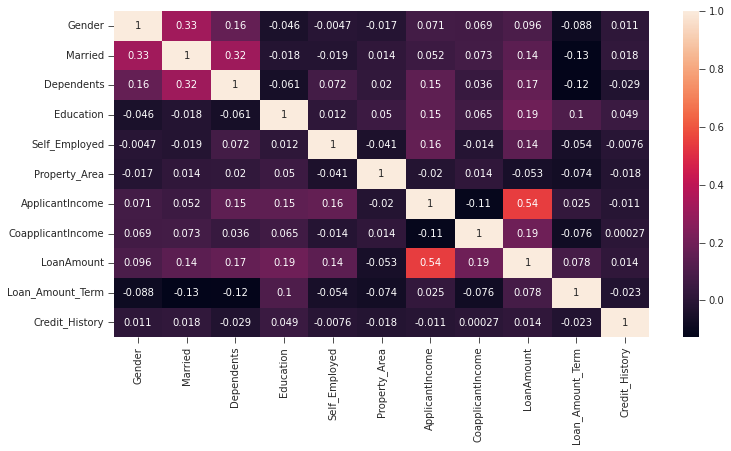

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(imputed_X_train.corr(),annot=True,cmap='rocket')

In [16]:
model = GradientBoostingClassifier(n_estimators=400, random_state=42)
model.fit(scaled_X_train, y_train)
preds = model.predict(scaled_X_val)
accuracy_score(y_val, preds)

0.6829268292682927

In [17]:
model_1 = KNeighborsClassifier(n_neighbors=11)
model_1.fit(scaled_X_train, y_train)
preds_1 = model_1.predict(scaled_X_val)
accuracy_score(y_val, preds_1)

0.7967479674796748

In [18]:
model_2 = RandomForestClassifier(n_estimators=350, random_state=42)
model_2.fit(scaled_X_train, y_train)
preds_2 = (model_2.predict(scaled_X_val))
accuracy_score(y_val, preds_2)

0.7723577235772358

In [19]:
model_3 = AdaBoostClassifier(n_estimators=150, random_state=42)
model_3.fit(scaled_X_train, y_train)
preds_3 = (model_3.predict(scaled_X_val))
accuracy_score(y_val, preds_3)

0.7560975609756098

In [20]:
y_test = model_1.predict(scaled_test)

In [21]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

In [22]:
y_test=np.where(y_test==1,'Y','N')

In [23]:
sample['Loan_Status']=y_test

In [24]:
sample.to_csv('result.csv',index=False)